In [15]:
from sympy import *
from scipy.optimize import fixed_point
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Define the symbolic variables
x_sym, y_sym = symbols('x y')

# Define the equations of the surfaces
f_sym = sin(x_sym) + cos(y_sym)
g_sym = x_sym * y_sym

# Define the initial guess for the intersection point
guess = np.array([1, 1])

# Define the function for the system of equations
f_func = lambdify((x_sym, y_sym), f_sym, 'numpy')
g_func = lambdify((x_sym, y_sym), g_sym, 'numpy')

In [31]:
# Define the function for the system of equations
def func(xy):
    x, y = xy
    f = f_func(x, y)
    g = g_func(x, y)
    return np.array([f, g])


In [32]:
# Find the intersection point using scipy.optimize.fixed_point
sol = fixed_point(func, guess, maxiter=50)

# Print the intersection point
print("Intersection point:")
print(f" x = {sol[0]:.4f}\n y = {sol[1]:.4f}")

Intersection point:
 x = 1.9346
 y = 0.0000


In [33]:
# Print the equation of the curve intersection
curve_eq = Eq(f_sym, g_sym)
print("Equation of curve intersection:")
display(curve_eq)

Equation of curve intersection:


Eq(sin(x) + cos(y), x*y)

In [34]:
# Create a meshgrid of x and y values to plot the surfaces
x_vals = np.linspace(-2, 2, 50)
y_vals = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluate the equations of the surfaces on the meshgrid
Z1 = np.sin(X) + np.cos(Y)
Z2 = X*Y


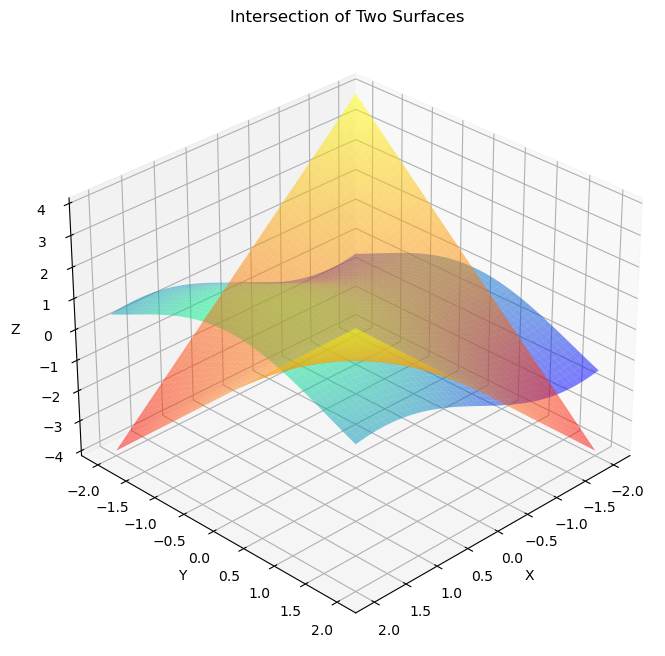

In [35]:
# Create a 3D plot of the surfaces and intersection curve
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, alpha=0.5, cmap='winter')
ax.plot_surface(X, Y, Z2, alpha=0.5, cmap='autumn')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Intersection of Two Surfaces')
ax.view_init(azim=45)
plt.show()

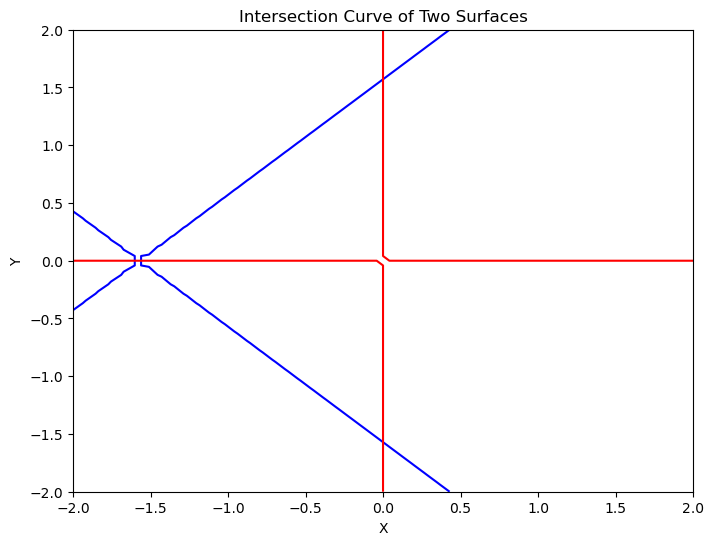

In [36]:
# Create a 2D plot of the intersection curve
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.contour(X, Y, Z1, levels=[sol[1]], colors='b')
ax.contour(X, Y, Z2, levels=[sol[1]], colors='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Intersection Curve of Two Surfaces')
plt.show()